# Medical insurance dataset

###### Submitted by: Leen Alnajjar

# Data science part 

## Step one: Data understanding and reading:

### 1. Libraries importing: 

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import infer_dtype
import warnings
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn.metrics as acc
warnings.filterwarnings('ignore')

### 2. Data presentation:

In [176]:
cols=['patientid','age','sex','bmi','children','smoker','region','charges']
dataset=pd.read_csv('meddical_insurance.csv',usecols =[col for col in cols if col != 'patientid'])

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### 3. Data understanding:

In [23]:
#Check the info of the dataset:
info=dataset.info() #Four obejects are in the file

#Check the null values:
null=dataset.isnull().sum()

#Check the duplicated values:
duplicate=dataset.duplicated().sum() 

#Check the mixed data type:
mixed=dataset.apply(lambda x: 'mixed' in infer_dtype(x)) 

#Check unique values
unique=dataset.iloc[:,:].nunique()

#Check the white spaces
whitespaces=dataset.columns.tolist() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 4. conclusion of step one:

Based on the above analysis, it can be concluded that the data contains 1339 records, seven features, and one output label data
the following information was extracted from the data:
1. Non null or duplicated data was found through the analysis. 
2. There were three columns with string values (region, sex,and smoker).
3. No mixed data type was found.
4. No problem regarding white spaces in the headers was found. 
5. The only problem that need to be solved is the categorical data problem.

## Step two: Statistical analysis

As a part of the analysis, the data were statistically analyzed, and then to illustrate the outliers, the box plot was used. 

### 1. Describe and sumarize the data statistically:

The data were statistically analyzed in order to find the maximum, minimum, and average of each feature, the following observations were obtained:

1.The average recorded age was 39 years.

2.The average BMI was 30, the maximum and the minmum were 53, 16 respectively. 

3.The average charges was 13270 and the maximum was 63770. 

In [24]:
dataset.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [33]:
dataset.describe(include=[np.object])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### 2. Describe and sumarize the data using boxplot:

To extensively illustrate the information regarding the data, the boxplot was used to exhibit the outliers and provide a clear comparison between each group.

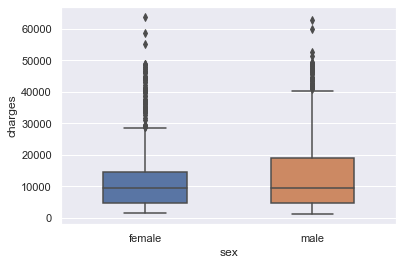

In [108]:
sns.boxplot(x="sex", y="charges", data=dataset , width=0.5)
plt.show()

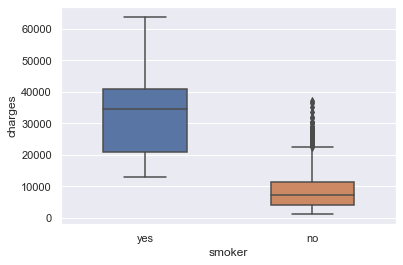

In [109]:
sns.boxplot(x="smoker", y="charges", data=dataset, width=0.5)
plt.show()

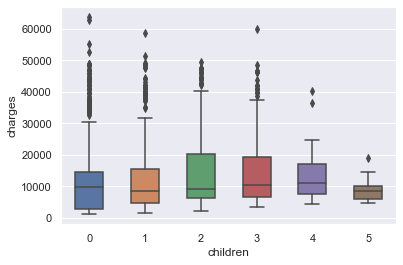

In [112]:
sns.boxplot(x="children", y="charges", data=dataset, width=0.5)
plt.show()

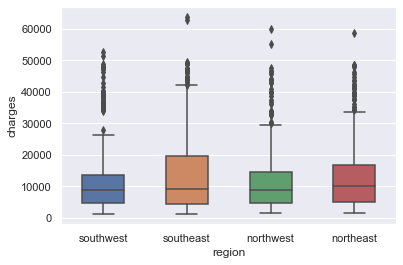

In [127]:
sns.boxplot(x="region", y="charges", data=dataset, width=0.5)
plt.show()

### 3. conclusion of step two:

Based on the above results, it can be concluded that the region has insignificant effect on the medical charges, on the other hand the smokers has fascinating impact of increasing the charges.


## Step three: Data pre-processing 

As mentioned earlier, the data contains three features of data type categorical, and this problem need to be solved in order to build machine learning model and visualize the data. 

### 1. Solve the categorical data problem:

The gender, region and smoker all of them has categorical data type , both gender and smoker can be solved using label encoder, while on the other hand the region problem was solved using get dummies. 

In [142]:
#Label encoding the sex column:
labelencoder=LabelEncoder() #Object defined
dataset['sex']=labelencoder.fit_transform(dataset['sex'])

In [143]:
#Label encoding the smoker column:
labelencoder=LabelEncoder() #Object defined
dataset['smoker']=labelencoder.fit_transform(dataset['smoker'])

In [144]:
#Encoding the region column:
data_encoded=pd.get_dummies(data=dataset['region'],drop_first=True)
merged = pd.concat([dataset,data_encoded],axis=1)
data = merged.drop(['region'], axis=1)

In [145]:
data

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


### 2.Data visualization:

Through the data visualization, the light was spot on the most important factors that led to an increase in insurance charges. Although gender and the region were not critical factors, but they were taken into account with the smoking and number of children. They were studied in order to give the company the insight to know which people slip they need to focus on in the future.

###### 1. Smoker people vs nonsmoker people:

The analysis was implemented on both male and female, it was found that the male smoker presents 58% of the overall smokers.

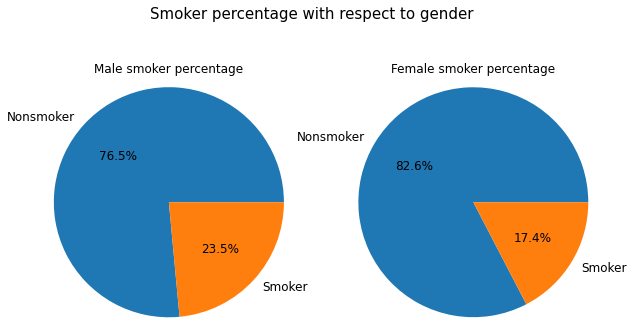

In [112]:
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
fig.suptitle("Smoker percentage with respect to gender", fontsize=15)

ax12 = plt.subplot2grid((2,2), (0,1))
ax12.pie( data[data['sex']==0]['smoker'].value_counts(), labels = ['Nonsmoker','Smoker'], autopct='%1.1f%%',radius=12,textprops={'fontsize': 12})
ax12.axis('equal')
ax12.title.set_text("Female smoker percentage")

ax11 = plt.subplot2grid((2,2), (0,0))
ax11.pie( data[data['sex']==1]['smoker'].value_counts(),labels = ['Nonsmoker','Smoker'],autopct='%1.1f%%', radius=12,textprops={'fontsize': 12})
ax11.axis('equal')

ax11.title.set_text("Male smoker percentage")
plt.show()

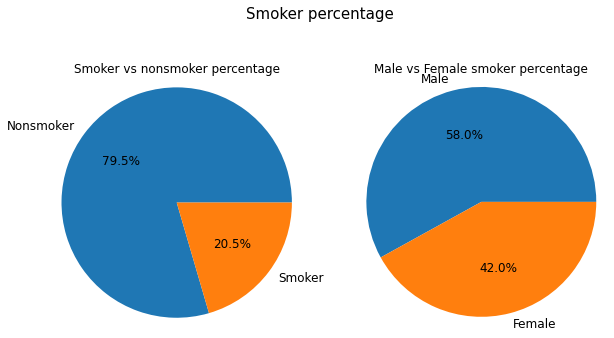

In [113]:
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()
fig.suptitle("Smoker percentage", fontsize=15)

ax12 = plt.subplot2grid((2,2), (0,0))
ax12.pie( data['smoker'].value_counts(), labels = ['Nonsmoker','Smoker'], autopct='%1.1f%%',radius=1.5,textprops={'fontsize': 12})
ax12.axis('equal')
ax12.title.set_text("Smoker vs nonsmoker percentage")
ax12.axis('equal')

ax11 = plt.subplot2grid((2,2), (0,1))
ax11.pie( data[data['smoker']==1]['sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%', radius=1.5,textprops={'fontsize': 12})
ax11.axis('equal')

ax11.title.set_text("Male vs Female smoker percentage")
plt.show()

###### 2. Body Mass Index:

The BMI was an extremely important factor because it mainly increases the risk factor against disease and decreases the response to medicine (prognosis) and ultimately increases the insurance expenditure.

To analyze the BMI factor, the BMI was categorise into four groups according to ['https://www.cdc.gov/obesity/basics/adult-defining.html']:

If your BMI is less than 18.5, it falls within the underweight range.

If your BMI is 18.5 to <25, it falls within the healthy weight range.

If your BMI is 25.0 to <30, it falls within the overweight range.

If your BMI is 30.0 or higher, it falls within the obesity range.

Obesity is frequently subdivided into categories:

Class 1: BMI of 30 to < 35

Class 2: BMI of 35 to < 40

Class 3: BMI of 40 or higher

In [122]:
print('BMI is less than 18.5 cost: ',data[(data['bmi']<18.5) & (data['smoker']==1)]['charges'].mean(), '$')
print('BMI is between 18.5 and 25 cost: ',data[(data['bmi']>18.5) & (dataset['bmi']<25) & (data['smoker']==1)]['charges'].mean(), '$')
print('BMI is between 25 and 30 cost: ',data[(data['bmi']>25) & (dataset['bmi']<30) & (data['smoker']==1)]['charges'].mean(), '$')
print('BMI is between 30 and 35 cost: ',data[(data['bmi']>30) & (dataset['bmi']<35) & (data['smoker']==1)]['charges'].mean(), '$')
print('BMI is between 35 and 40 cost: ',data[(data['bmi']>35) & (dataset['bmi']<40) & (data['smoker']==1)]['charges'].mean(), '$')
print('BMI is higher than 40 cost: ',data[(data['bmi']>40) &  (data['smoker']==1)]['charges'].mean(), '$')


BMI is less than 18.5 cost:  18809.825999999997 $
BMI is between 18.5 and 25 cost:  19942.223200000004 $
BMI is between 25 and 30 cost:  22495.87405405406 $
BMI is between 30 and 35 cost:  39889.67014285715 $
BMI is between 35 and 40 cost:  42753.62279999998 $
BMI is higher than 40 cost:  45467.78761904762 $


In [131]:
print('BMI is less than 18.5 cost: ',data[(data['bmi']<18.5) & (data['smoker']==0)]['charges'].mean(), '$')
print('BMI is between 18.5 and 25 cost: ',data[(data['bmi']>18.5) & (dataset['bmi']<25) & (data['smoker']==0)]['charges'].mean(), '$')
print('BMI is between 25 and 30 cost: ',data[(data['bmi']>25) & (dataset['bmi']<30) & (data['smoker']==0)]['charges'].mean(), '$')
print('BMI is between 30 and 35 cost: ',data[(data['bmi']>30) & (dataset['bmi']<35) & (data['smoker']==0)]['charges'].mean(), '$')
print('BMI is between 35 and 40 cost: ',data[(data['bmi']>35) & (dataset['bmi']<40) & (data['smoker']==0)]['charges'].mean(), '$')
print('BMI is higher than 40 cost: ',data[(data['bmi']>40) &  (data['smoker']==0)]['charges'].mean(), '$')


BMI is less than 18.5 cost:  5532.993333333333 $
BMI is between 18.5 and 25 cost:  7616.209181286548 $
BMI is between 25 and 30 cost:  8243.256419354844 $
BMI is between 30 and 35 cost:  8540.598446601938 $
BMI is between 35 and 40 cost:  9670.244137931035 $
BMI is higher than 40 cost:  8179.664714285711 $


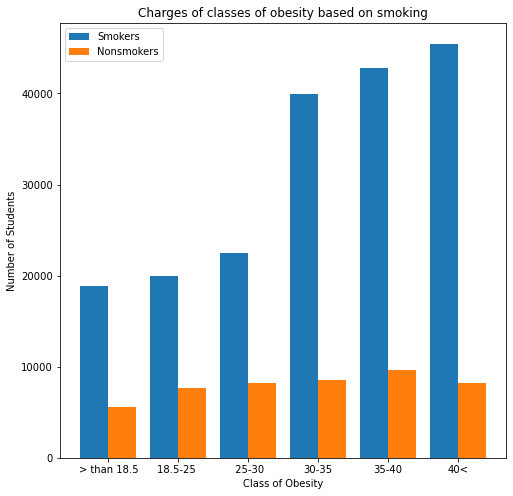

In [189]:
plt.rcParams['figure.figsize'] = [8, 8]
fig = plt.figure()
X = ["> than 18.5","18.5-25 "," 25-30","30-35",'35-40','40<']
Ysmoker = [18809.825999999997,19942.223200000004,22495.87405405406,39889.67014285715,42753.62279999998,45467.78761904762]
Znonsmoker = [5532.993333333333,7616.209181286548,8243.256419354844,8540.598446601938,9670.244137931035,8179.664714285711]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ysmoker, 0.4, label = 'Smokers')
plt.bar(X_axis + 0.2, Znonsmoker, 0.4, label = 'Nonsmokers')
  
plt.xticks(X_axis, X)
plt.xlabel("Class of Obesity")
plt.ylabel("Number of Students")
plt.title("Charges of classes of obesity based on smoking")
plt.legend()
plt.show()

###### 1.As seen from the above bar chart, it is clear that smokers significantly increase the charges in all classes, accordingly the remaining analysis focuses on these slips.

###### 2. The bar chart illustrasts that pasients with BMI above 30 has the high charges values, which means that it is important to spot the light on these people.

###### 3.Smoker people with obesity with respect to gender:

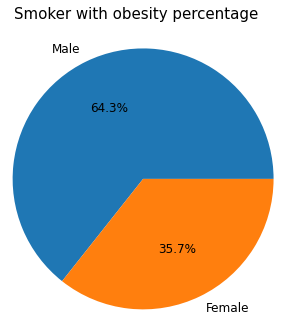

In [167]:
plt.rcParams['figure.figsize'] = [5, 5]
fig = plt.figure()
fig.suptitle("Smoker with obesity percentage ", fontsize=15)
plt.pie( data[(data['bmi']>30) & (data['smoker']==1)]['sex'].value_counts(), labels = ['Male','Female'], autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 12})
plt.show()

###### The male present 64.3% of the obesity patients, accordingly it it importnat to check if this slip lead to increase the charges or not, by cheacking the mean chagrges for male and female:

In [190]:
data[(data['bmi']>30) & (data['smoker']==1) & (data['sex']==0)]['charges'].mean()

42497.34803921568

In [206]:
data[(data['bmi']>30) & (data['smoker']==1) & (data['sex']==1)]['charges'].mean()

41337.95934782609

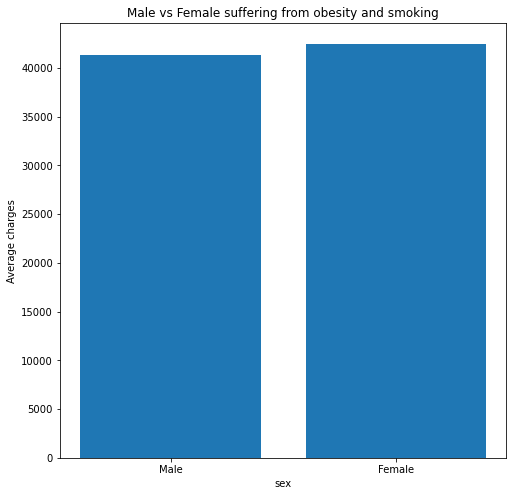

In [208]:
x_axis = ['Male','Female']
y_axis = [41337.95934782609, 42497.34803921568]

plt.bar(x_axis, y_axis)
plt.title('Male vs Female suffering from obesity and smoking')
plt.xlabel('sex')
plt.ylabel('Average charges')
plt.show()

###### It can be concluded that gender won't affect the results or lead to a significant change in the insurance cost although the notable difference between the percentage of males and females suffering from obesity and smoking.

###### 3.Number of children:

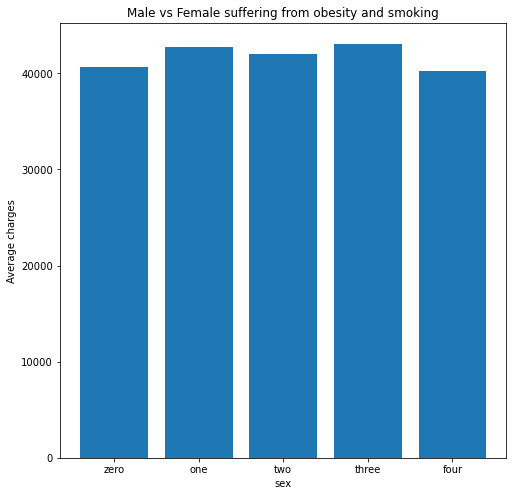

In [246]:
x_axis = ['zero','one','two','three','four']
y_axis=[data[(data['bmi']>30) & (data['smoker']==1) & (data['children']==i)]['charges'].mean() for i in range(5)]
plt.bar(x_axis, y_axis)
plt.title('Male vs Female suffering from obesity and smoking')
plt.xlabel('sex')
plt.ylabel('Average charges')
plt.show()

As shown in the statistical analysis, number of children has slightly impact on increasing the insurance cost , but when tested in the differance was almost negligable.

###### Lastly, based on the analysis, it can be concluded that the body mass index and the smoking only affected on increasing the insurance, it is also important to mention that the patient with BMI above 30 and smoking cost in average 41000 without taking any consideration regarding gender.

# Machine learning part

Building model, linear regression model was selected initally as regression model to build the prediction model. 

### step one: Split the data to dependent and independent:

In [269]:
#Now split the data before continue:
X=data.loc[:, data.columns != 'charges'].iloc[:,:].values # Independent variables  
y=data.iloc[:,5].values #Dependent variables



### Step three: Apply the linear regression model:

In [274]:
X=np.append(arr=np.ones((1338,1)),values=X,axis=1) # Add the constant of the equation

In [275]:
#Apply the feature selection using backward elemination
def reg_ols(X,y):
    columns=list(range(X.shape[1]))#it will do it just one time
    a={}
    for i in range(X.shape[1]):
        X_opt=np.array(X[:,columns],dtype=float) #every time X_opt will change depend on the columns
        regressor_ols=sm.OLS(endog=y,exog=X_opt).fit()#regressor between x_opt and y
        pvalues = list(regressor_ols.pvalues)#save pvalues column as a list
        d=max(pvalues)#find the maximum value in the list
        if (d>0.06):#if the maximum value bigger than 0.09 then we need to drop the column
            for k in range(len(pvalues)):#for loop to check the values in pvalues to find where is the max
                if(pvalues[k] == d):#if the value of in the index = max the delete it
                    a[k]=d
                    del(columns[k])  
    
    return(X_opt,regressor_ols,a)

X_opt,regressor_ols,a=reg_ols(X, y)
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        05:47:57   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6084.1767    474.763    -12.815      0.000   -7015.542   -5152.811
x1         -6084.1767    474.763    -12.815      0.000   -7015.542   -5152.811
x2           256.9892     11.889     21.616      0.000     233.666     280.312
x3           338.7383     28.553     11.864      0.000     282.725     394.752
x4           471.7334    137.651      3.427      0.001     201.696     741.771
x5          2.384e+04    411.645     57.921      0.000     2.3e+04    2.47e+04
x6          -859.1326    415.199     -2.069      0.039   -1673.647     -44.618
x7          -782.0894    413.737     -1.890      0.059   -1593.736      29.558
==============================================================================
Omnibus:                      300.260   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.088
Skew:                           1.212   Prob(JB):                    1.93e-156
Kurtosis:                       5.644   Cond. No.                     1.23e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Step two: Splet the data to train and test:

In [276]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_opt_train,X_opt_test,y_opt_train,y_opt_test=train_test_split(X_opt,y,test_size=1/3,random_state=0)


### Step three: Train the mode:

In [277]:
linearRegression=LinearRegression()
linearRegression.fit(X_opt_train,y_opt_train)

y_opt_pred=linearRegression.predict(X_opt_test)


### Step four: Test the accuracy:

In [280]:
print("Explain variance score =", (acc.r2_score(y_opt_test,y_opt_pred)*100))

Explain variance score = 78.8259452489119


### Step five: model enhancement using decision tree regression

Through the enhancement model , the forward selection and decision tree were selected as feature selection and regression moddel respectively

In [285]:
X=data.loc[:, data.columns != 'charges'].iloc[:,:] # Independent variables  
y=data.iloc[:,5] #Dependent variables

In [286]:
# Greedy feuter selection  and model selection
def forward_selection(data,target,significance_level=0.05):
    initial_features=data.columns.tolist()
    best_features2=[]
    while (len(initial_features)>0):
        remaining_features=list(set(initial_features)-set(best_features2))
        new_pval=pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model=sm.OLS(target,sm.add_constant(data[best_features2+[new_column]])).fit()
            new_pval[new_column]=model.pvalues[new_column]
        min_p_value=new_pval.min()
        if (min_p_value<significance_level):
            best_features2.append(new_pval.idxmin())
        else:
            break
    return best_features2     

best_features2=forward_selection(X, y)

In [287]:
best_features2

['smoker', 'age', 'bmi', 'children']

In [295]:
X2=data.loc[:,best_features2]
y= data['charges']

In [300]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
## DTreeRegression  
X_train,X_test,y_train,y_test=train_test_split(X ,y, test_size=0.2 ,random_state=0)

DTR=(DecisionTreeRegressor(random_state=0))
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [308]:
dt_optimal = DecisionTreeRegressor(**grid_search.best_params_,random_state=0)
dt_optimal.fit(X_train, y_train)
y_pred = dt_optimal.predict(X_test)
print("Explain variance score =", (acc.r2_score(y_test,y_pred)*100))

Explain variance score = 89.13953640004728


## Conclusion 

###### To be concluded, the decision tree model provided better results of about 89.1% in comparision with the multiple linear regression, the feature selection said that the 'smoker', 'age', 'bmi', 'children' , are most likely to affect the cost of insurance while the region, and gender has no effect. For further recommendation , paitents with BMI higher than 30 and smoke are most likely to require further healthcare in the future and accordingly the cost of chareges will increase, however, it is still chalanging to provide accurate results without further nformation regarding the patient life stype and disease history. 